# Market Basket Analysis

## Import Libraries

In [2]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00


In [3]:
# Data manipulation
import pandas as pd

# Market Basket Analysis tools
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Graph-based visual for association rules
import networkx as nx

## Loading and Preprocessing

In [12]:
# Load your CSV file
df = pd.read_excel("Canteen_Sales.xlsx")

In [13]:
df.head()

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

In [14]:
df.tail()

transaction_id transaction_date transaction_time  transaction_qty  \
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id  store_location  product_id  unit_price product_category  \
149111         8  Hell's Kitchen          44        2.50              Tea   
149112         8  Hell's Kitchen          49        3.00              Tea   
149113         8  Hell's Kitchen          45        3.00              Tea   
149114         8  Hell's Kitchen          40        3.75           Coffee   
149115         8  Hell's Kitchen          64        0.80         Flavours   

             product_type        product_detail  
149111  Brewed herbal tea         Peppermint Rg  
149112   Brewed Black tea  English Breakfast Lg  
149113  Brewed herbal tea         Peppermint Lg  
149114   Barista Espresso            Cappuccino  
149115      Regular syrup        Hazelnut syrup

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [17]:
df.shape

(149116, 11)

In [21]:
# Combining transcation_time column with transaction_date column to make timestamp column
df['timestamp'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))

In [22]:
df

transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_category  \
0              5  Lower Manhattan          32        3.00              Coffee   
1              5  Lower Manhattan          57        3.10                 Tea   
2              5  Lower Manhattan          59        4.50  Drinking Chocolate   
3              5  Lower Manhattan          22        2.00              Coffee   
4              5  Lower Manhattan          57        3.10                 Tea   
...          ...              ...         ...         ...                 ...   
149111         8   Hell's Kitchen          44        2.50                 Tea   
149112         8   Hell's Kitchen          49        3.00                 Tea   
149113         8   Hell's Kitchen          45        3.00                 Tea   
149114         8   Hell's Kitchen          40        3.75              Coffee   
149115         8   Hell's Kitchen          64        0.80            Flavours   

                 product_type               product_detail           timestamp  
0       Gourmet brewed coffee                  Ethiopia Rg 2023-01-01 07:06:11  
1             Brewed Chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:08:56  
2               Hot chocolate            Dark chocolate Lg 2023-01-01 07:14:04  
3                 Drip coffee  Our Old Time Diner Blend Sm 2023-01-01 07:20:24  
4             Brewed Chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:22:41  
...                       ...                          ...                 ...  
149111      Brewed herbal tea                Peppermint Rg 2023-06-30 20:18:41  
149112       Brewed Black tea         English Breakfast Lg 2023-06-30 20:25:10  
149113      Brewed herbal tea                Peppermint Lg 2023-06-30 20:31:34  
149114       Barista Espresso                   Cappuccino 2023-06-30 20:57:19  
149115          Regular syrup               Hazelnut syrup 2023-06-30 20:57:19  

[149116 rows x 12 columns]

In [23]:
# Standardizing to improve accuracy
df['product_type'] = df['product_type'].str.strip().str.lower()

In [24]:
df

transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_category  \
0              5  Lower Manhattan          32        3.00              Coffee   
1              5  Lower Manhattan          57        3.10                 Tea   
2              5  Lower Manhattan          59        4.50  Drinking Chocolate   
3              5  Lower Manhattan          22        2.00              Coffee   
4              5  Lower Manhattan          57        3.10                 Tea   
...          ...              ...         ...         ...                 ...   
149111         8   Hell's Kitchen          44        2.50                 Tea   
149112         8   Hell's Kitchen          49        3.00                 Tea   
149113         8   Hell's Kitchen          45        3.00                 Tea   
149114         8   Hell's Kitchen          40        3.75              Coffee   
149115         8   Hell's Kitchen          64        0.80            Flavours   

                 product_type               product_detail           timestamp  
0       gourmet brewed coffee                  Ethiopia Rg 2023-01-01 07:06:11  
1             brewed chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:08:56  
2               hot chocolate            Dark chocolate Lg 2023-01-01 07:14:04  
3                 drip coffee  Our Old Time Diner Blend Sm 2023-01-01 07:20:24  
4             brewed chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:22:41  
...                       ...                          ...                 ...  
149111      brewed herbal tea                Peppermint Rg 2023-06-30 20:18:41  
149112       brewed black tea         English Breakfast Lg 2023-06-30 20:25:10  
149113      brewed herbal tea                Peppermint Lg 2023-06-30 20:31:34  
149114       barista espresso                   Cappuccino 2023-06-30 20:57:19  
149115          regular syrup               Hazelnut syrup 2023-06-30 20:57:19  

[149116 rows x 12 columns]

In [25]:
# Keeping items bought more than 5 times to remomve anomalies in the data
product_counts = df['product_type'].value_counts()
popular_products = product_counts[product_counts >= 5].index
df = df[df['product_type'].isin(popular_products)]

In [26]:
df

transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_category  \
0              5  Lower Manhattan          32        3.00              Coffee   
1              5  Lower Manhattan          57        3.10                 Tea   
2              5  Lower Manhattan          59        4.50  Drinking Chocolate   
3              5  Lower Manhattan          22        2.00              Coffee   
4              5  Lower Manhattan          57        3.10                 Tea   
...          ...              ...         ...         ...                 ...   
149111         8   Hell's Kitchen          44        2.50                 Tea   
149112         8   Hell's Kitchen          49        3.00                 Tea   
149113         8   Hell's Kitchen          45        3.00                 Tea   
149114         8   Hell's Kitchen          40        3.75              Coffee   
149115         8   Hell's Kitchen          64        0.80            Flavours   

                 product_type               product_detail           timestamp  
0       gourmet brewed coffee                  Ethiopia Rg 2023-01-01 07:06:11  
1             brewed chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:08:56  
2               hot chocolate            Dark chocolate Lg 2023-01-01 07:14:04  
3                 drip coffee  Our Old Time Diner Blend Sm 2023-01-01 07:20:24  
4             brewed chai tea     Spicy Eye Opener Chai Lg 2023-01-01 07:22:41  
...                       ...                          ...                 ...  
149111      brewed herbal tea                Peppermint Rg 2023-06-30 20:18:41  
149112       brewed black tea         English Breakfast Lg 2023-06-30 20:25:10  
149113      brewed herbal tea                Peppermint Lg 2023-06-30 20:31:34  
149114       barista espresso                   Cappuccino 2023-06-30 20:57:19  
149115          regular syrup               Hazelnut syrup 2023-06-30 20:57:19  

[149116 rows x 12 columns]

### Some Viz

C:\Users\DeLL\AppData\Local\Temp\ipykernel_35956\4166117135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="mako")


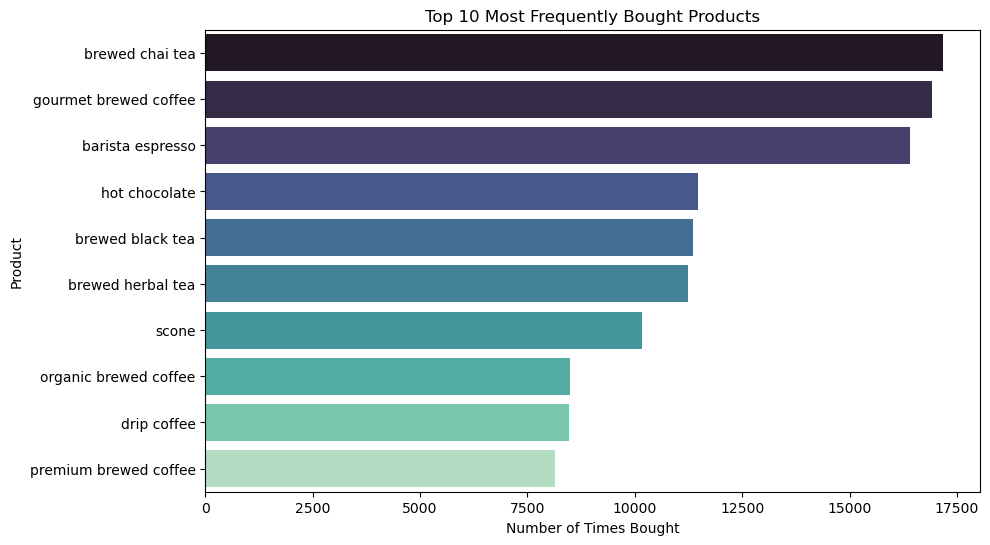

In [27]:
top_products = df['product_type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Most Frequently Bought Products")
plt.xlabel("Number of Times Bought")
plt.ylabel("Product")
plt.show()

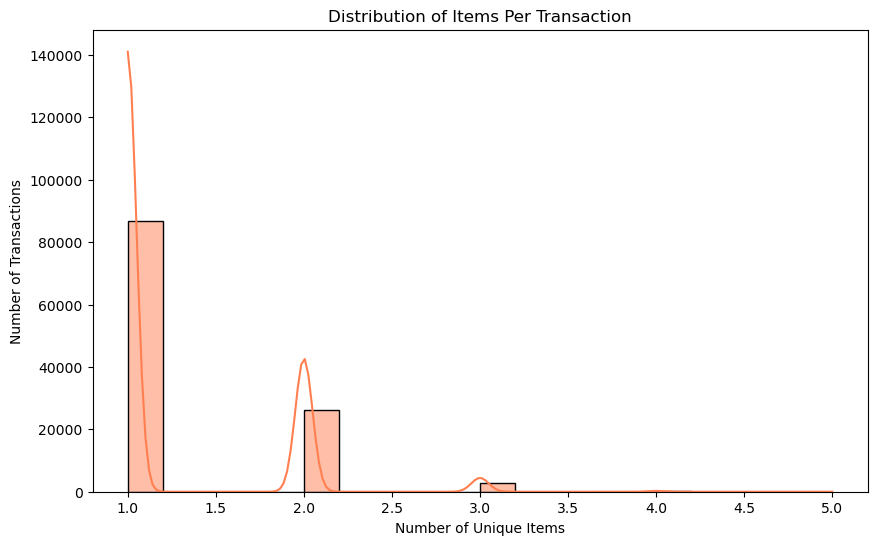

In [28]:
transaction_sizes = df.groupby('timestamp')['product_type'].nunique()

plt.figure(figsize=(10,6))
sns.histplot(transaction_sizes, bins=20, kde=True, color='coral')
plt.title("Distribution of Items Per Transaction")
plt.xlabel("Number of Unique Items")
plt.ylabel("Number of Transactions")
plt.show()

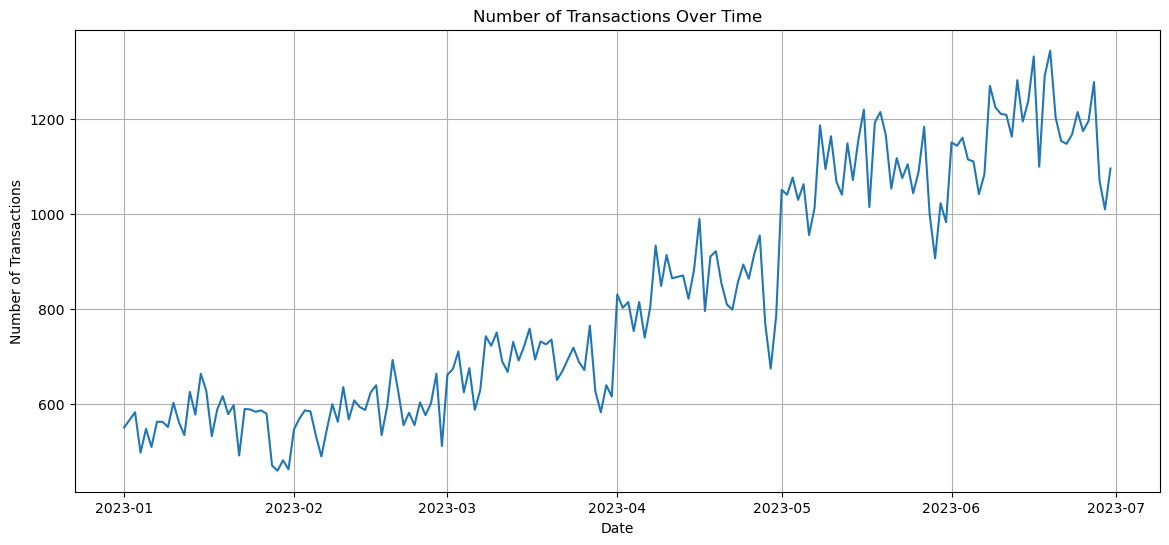

In [29]:
df['date_only'] = df['timestamp'].dt.date  # Extract date from timestamp
daily_counts = df.groupby('date_only')['transaction_id'].nunique()

plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

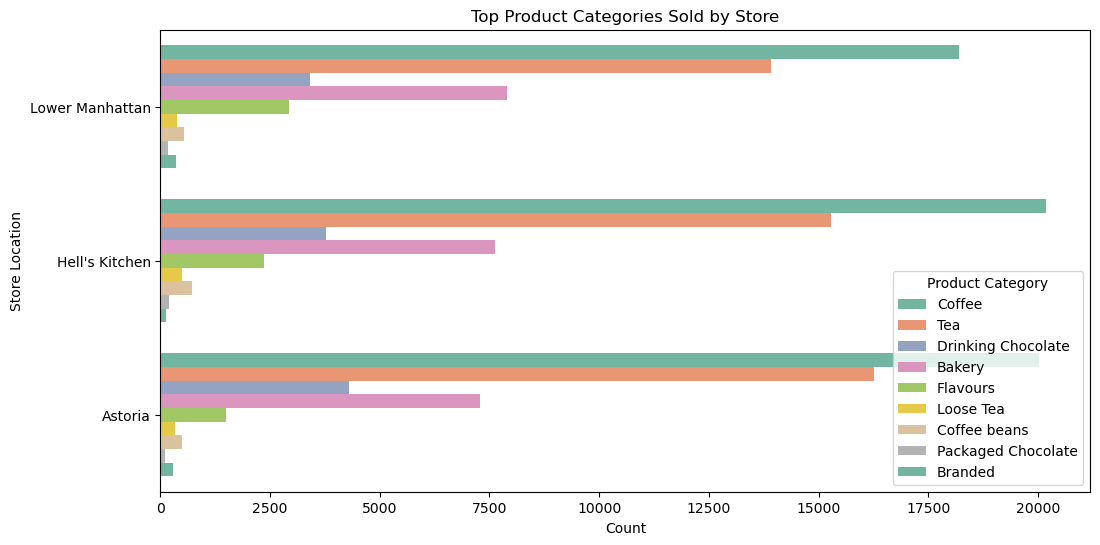

In [30]:
top_stores = df['store_location'].value_counts().head(5).index
filtered_df = df[df['store_location'].isin(top_stores)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, y='store_location', hue='product_category', palette="Set2")
plt.title("Top Product Categories Sold by Store")
plt.xlabel("Count")
plt.ylabel("Store Location")
plt.legend(title='Product Category')
plt.show()

### Basket Analysis

In [36]:
# Group by timestamp and product_type, and sum the quantity bought
basket = df.groupby(['timestamp', 'product_type'])['transaction_qty'].sum().unstack().fillna(0)

# Convert quantity to binary: 1 if bought, 0 if not
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Preview the basket
print(basket.head())

C:\Users\DeLL\AppData\Local\Temp\ipykernel_35956\4040588068.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product_type         barista espresso  biscotti  black tea  brewed black tea  \
timestamp                                                                      
2023-01-01 07:06:11                 0         0          0                 0   
2023-01-01 07:08:56                 0         0          0                 0   
2023-01-01 07:14:04                 0         0          0                 0   
2023-01-01 07:20:24                 0         0          0                 0   
2023-01-01 07:22:41                 0         0          0                 0   

product_type         brewed chai tea  brewed green tea  brewed herbal tea  \
timestamp                                                                   
2023-01-01 07:06:11                0                 0                  0   
2023-01-01 07:08:56                1                 0                  0   
2023-01-01 07:14:04                0                 0                  0   
2023-01-01 07:20:24                0                 0

In [37]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with min_support threshold (adjustable)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Preview results
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

    support                 itemsets
3  0.147500        (brewed chai tea)
7  0.145313  (gourmet brewed coffee)
0  0.140172       (barista espresso)
8  0.098614          (hot chocolate)
2  0.097581       (brewed black tea)


C:\Users\DeLL\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Generating Association Rules

In [38]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [39]:
rules = rules.sort_values(by="lift", ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

antecedents         consequents   support  confidence      lift
0     (regular syrup)  (barista espresso)  0.042565    0.994968  7.098207
1  (barista espresso)     (regular syrup)  0.042565    0.303661  7.098207
5  (barista espresso)  (sugar free syrup)  0.015483    0.110456  7.090727
4  (sugar free syrup)  (barista espresso)  0.015483    0.993919  7.090727
3  (barista espresso)             (scone)  0.016361    0.116722  1.344856

In [40]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].tail()

antecedents         consequents   support  confidence      lift
1  (barista espresso)     (regular syrup)  0.042565    0.303661  7.098207
5  (barista espresso)  (sugar free syrup)  0.015483    0.110456  7.090727
4  (sugar free syrup)  (barista espresso)  0.015483    0.993919  7.090727
3  (barista espresso)             (scone)  0.016361    0.116722  1.344856
2             (scone)  (barista espresso)  0.016361    0.188511  1.344856

C:\Users\DeLL\AppData\Local\Temp\ipykernel_35956\831944849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette="Blues_d")


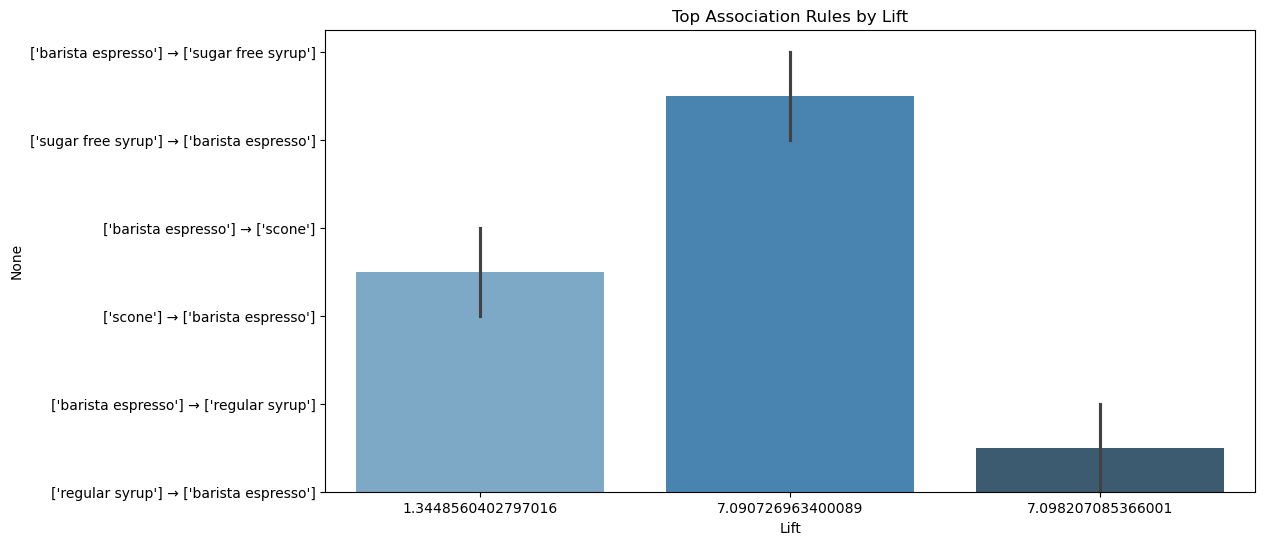

In [43]:
# Sort by lift or confidence
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette="Blues_d")
plt.yticks(ticks=top_rules.index, labels=[f"{list(a)} → {list(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.xlabel("Lift")
plt.title("Top Association Rules by Lift")
plt.show()

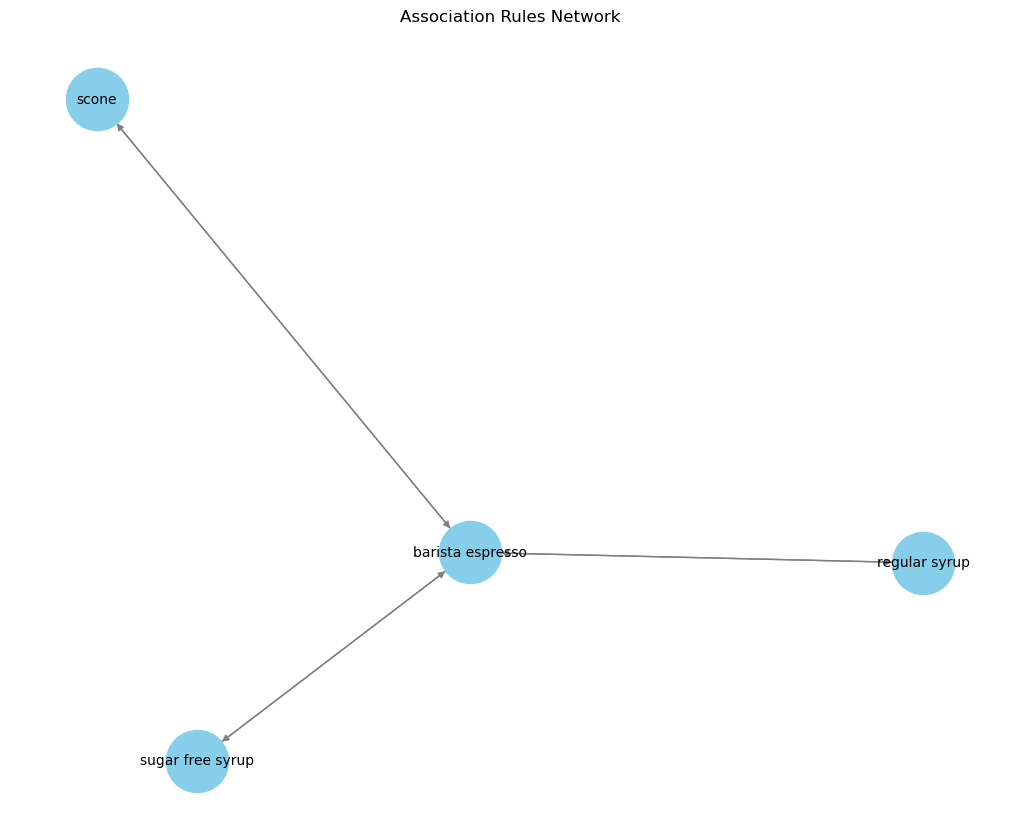

In [42]:
import networkx as nx

G = nx.DiGraph()

for _, row in rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10, arrows=True)
plt.title("Association Rules Network")
plt.show()

## 📌 Apriori Analysis Summary

### 🔧 Methodology Used

For this analysis, we applied the **Apriori algorithm** to identify associations between product types purchased together at a café. The process included:

1. **Preprocessing:**
   - Grouped transaction data by timestamp to simulate customer baskets.
   - Converted product purchases into a one-hot encoded format (basket matrix).

2. **Apriori Algorithm:**
   - Applied the `mlxtend` library’s `apriori` method to identify frequent itemsets using a defined **minimum support threshold**.
   - Generated association rules using `association_rules()` with a focus on **confidence** and **lift**.

3. **Filtering Rules:**
   - Rules were filtered and sorted by high **lift** and **confidence** to surface the most meaningful patterns.

---

### 📊 Key Insights from the Association Rules

| Rule | Insight |
|------|---------|
| **(regular syrup → barista espresso)** | Almost every customer who buys regular syrup also buys espresso (**99.5% confidence**, **7.1 lift**). Strong upsell potential. |
| **(barista espresso → regular syrup)** | Only 30.4% of espresso buyers also get regular syrup — meaning syrup is a targeted add-on. |
| **(sugar free syrup → barista espresso)** | Nearly all sugar-free syrup buyers also purchase espresso (**99.4% confidence**, **7.1 lift**). |
| **(barista espresso → sugar free syrup)** | 11% of espresso drinkers choose sugar-free syrup — a niche but health-conscious segment. |
| **(barista espresso → scone)** | ~11.7% of espresso buyers also get a scone. Moderate lift (1.34), suggests possible snack pairing. |

---

### 💡 Business Implications

- **Cross-Selling Opportunity**: Bundle syrups with espresso to increase average transaction value.
- **Targeted Promotions**: Offer health-conscious options (sugar-free syrups) as personalized suggestions.
- **Menu Recommendations**: Promote snacks like scones as espresso pairings during peak hours.
- **Inventory Planning**: Recognize frequently paired items for stocking decisions and combos.